In [2]:
path= "Dataset/InstanceSegmentation.v1i.coco/train"



In [3]:
import os
root = "Dataset/InstanceSegmentation.v1i.coco/train"

In [4]:
# import os
# os.listdir(root)

In [5]:
dis = "Dataset/rice_leaf_diseases"

In [6]:
image_paths = []

for files in os.listdir(root):
  if files.endswith('.json'):
    annotattions_path = files
    print(files)
  elif files.endswith('.jpg') or files.endswith('.JPG'):
    image_paths.append(files)


_annotations.coco.json


In [7]:
annotattions_path

'_annotations.coco.json'

In [8]:
full_an_path = root + '/'+annotattions_path
print(full_an_path)

Dataset/InstanceSegmentation.v1i.coco/train/_annotations.coco.json


In [9]:
import json
with open(full_an_path) as f:
  json_data = json.load(f)

In [10]:
# json_data

In [11]:
!pip install pycocotools

In [12]:
from pycocotools.coco import COCO
coco = COCO(full_an_path)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [13]:
image_ids = coco.getImgIds()
cat_ids = coco.getCatIds()
ann_ids = coco.getAnnIds()

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


{'id': 0, 'image_id': 0, 'category_id': 1, 'bbox': [4, 52, 96.68, 26.407], 'area': 2553.03, 'segmentation': [[100.259, 67.739, 100.156, 58.461, 93.51, 59.532, 96.417, 51.681, 75.44, 56.32, 58.41, 58.104, 43.664, 60.959, 25.803, 67.382, 3.58, 70.237, 8.98, 76.304, 33.902, 78.088, 44.297, 75.006, 61.11, 75.233, 76.894, 73.806, 88.213, 67.739, 100.259, 67.739]], 'iscrowd': 0}
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


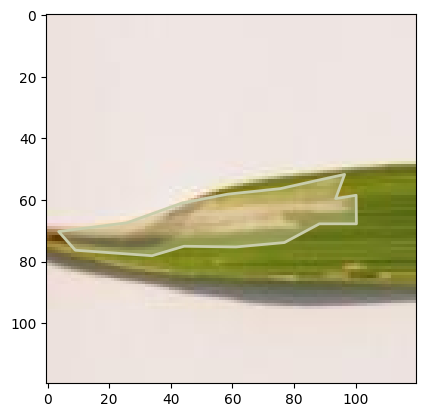

In [15]:
for i in image_ids:
    img = coco.imgs[image_ids[i]]
    image = np.array(Image.open(os.path.join(root, img['file_name'])))
    plt.imshow(image)
    cat_ids = coco.getCatIds()
    anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    print(anns[0])
    m = coco.annToMask(anns[0])
    for i in range(len(anns)):
      m += coco.annToMask(anns[i])
    print(m)
    coco.showAnns(anns)

DSC_0384_JPG.rf.09a9ce0f0b0224d7917d6f0c4d54098d.jpg
DSC_0304_JPG.rf.03848290ac13e37854d06a97d5afb558.jpg
DSC_0397_JPG.rf.0d8d3e9dba2bc611805d6136248ce8b5.jpg
DSC_0293_JPG.rf.1cccebc8323c6380f4723ec314ad5d00.jpg
DSC_0514_jpg.rf.041312e81627f2d0d09d0c5baee298b5.jpg
DSC_0329_jpg.rf.16edf2fae089cdf6fb8863b2062ebfe3.jpg
DSC_0510_jpg.rf.217da5f16f0139b75cdfc13aa2ab1695.jpg
DSC_0375_JPG.rf.2111e51c982ddaaa760b43305f08b383.jpg
DSC_0391_jpg.rf.1edc1dd7ffcbdb02dc049ee73ffe6d45.jpg
DSC_0378_JPG.rf.244a60fb0f60cdbe48b5ea5d5a14880d.jpg
DSC_0511_jpg.rf.27f2f48eb95cd73a25554bc04c88a23b.jpg
DSC_0106_jpg.rf.2feff01526ea112cb1e6c073e55a23d6.jpg
DSC_0333_JPG.rf.195fa4b12ba92e792342d05db04f5e4c.jpg
DSC_0385_jpg.rf.3556990181a181b8429b67ce12397d06.jpg
DSC_0404_JPG.rf.24a7d4bcde6cca2b49c8d4e92f6a49c4.jpg
DSC_0700_jpg.rf.2cb915cb2b76a737b838b75bef2fb17a.jpg
DSC_0110_jpg.rf.3ce947e8884b35cd41893a4ec0bb0445.jpg
DSC_0502_jpg.rf.01440052ba7561dfae58cd757d38ddd4.jpg
DSC_0307_JPG.rf.365b77abd830826e30d9c8ec238646

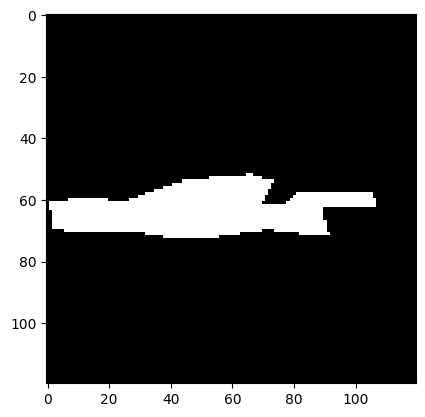

In [16]:
for i in image_ids:
    img = coco.imgs[image_ids[i]]
    image = np.array(Image.open(os.path.join(root, img['file_name'])))
    anns_id = coco.getAnnIds(imgIds=img['id'], catIds=coco.getCatIds(), iscrowd=None)
    anns = coco.loadAnns(anns_id)
    mask = coco.annToMask(anns[0])
    for j in range(len(anns)):
        mask+=coco.annToMask(anns[j])
    print(img['file_name'])
    plt.imshow(mask, cmap='gray')
    file_name ="masked_imgs/"+img['file_name']
    plt.imsave(file_name, mask, cmap='gray')